<a href="https://colab.research.google.com/github/apschlissel/w266-final-project/blob/main/Reddit_(BERT%2BNB)_(Kevin)_(80_10_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Setup

In [2]:
!pip install -q transformers

     |████████████████████████████████| 4.0 MB 4.4 MB/s 
     |████████████████████████████████| 895 kB 69.6 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 6.5 MB 47.6 MB/s 
     |████████████████████████████████| 596 kB 70.5 MB/s 


In [3]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 4.2 MB/s 
     |████████████████████████████████| 325 kB 76.1 MB/s 
     |████████████████████████████████| 1.8 MB 62.4 MB/s 
     |████████████████████████████████| 10.1 MB 79.5 MB/s 
     |████████████████████████████████| 1.2 MB 78.5 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 64.9 MB/s 
     |████████████████████████████████| 181 kB 76.9 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 212 kB 55.4 MB/s 
     |████████████████████████████████| 136 kB 82.0 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |████████████████████████████████| 127 kB 73.1 MB/s 
     |████████████████████████████████| 144 kB 75.4 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 28.2 MB/s 
     |████████████████████████████████| 111 kB 62.7 MB/s 
     |██████████████

In [4]:
!pip install setuptools==59.5.0

     |████████████████████████████████| 952 kB 4.2 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.12.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
# Useful Links / Source Code
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://medium.com/@senthilnathangautham/colab-gcp-compute-how-to-link-them-together-98747e8d940e
# Source: https://stackoverflow.com/questions/49031798/when-i-use-google-colaboratory-how-to-save-image-weights-in-my-google-drive

In [6]:
from __future__ import print_function
import ipywidgets as widgets
from transformers import pipeline
from transformers.models.bert.modeling_bert import BertEmbeddings
from simpletransformers.t5 import T5Model, T5Args
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging
import numpy as np
import torch
from tqdm.notebook import tqdm
from transformers import BertModel, BertConfig
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
import json
import random
import math
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from pathlib import Path
import csv
import time
import datetime

In [7]:
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('pigKA_TKnDkXcatEGcbo8g', 'nawGKK2MfPtC6vKz8TjaNEnmYfAggA')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Katsuuu100',
        'password': 'Testing159753'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyBot/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

# [1st pass only] Original Reddit puller (100-500 posts)

- Pull data from reddit by scraping from webpage (HTML) and using Reddit API
- Select 5 slang-heavy "subreddits" (subcategories of forums within Reddit.com) by hand
- Select 5 random subreddits

In [ ]:
# HTML web scraper, scrape top subreddits, SFW only.
# 
# Source: https://realpython.com/beautiful-soup-web-scraper-python/
# Source: https://stackoverflow.com/questions/40210093/how-do-i-scrape-only-div-class-quotetext-from-a-website-using-python


URL = "http://redditlist.com/sfw/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
# print(soup.prettify())
job_elements = soup.find_all("div", class_="listing-item")

# print(job_elements[0])

# Filter to only the Top 125 Most subscribed subreddits
job_elements = job_elements[125:250]

master_subreddit_list = []
# Find subreddit names
for job_element in job_elements:
  links = job_element.find_all("a")
  for link in links:
    # print(link.text.strip())
    master_subreddit_list.append(link.text.strip())

In [ ]:
# 5 handpicked subreddits
# five_random_subreddits = ['wallstreetbets', 'teenagers', 'GenZ', 'copypasta', 'unpopularopinion']
# print(five_random_subreddits)

# 5 very similar subreddits
five_random_subreddits = ['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']
print(five_random_subreddits)

# 5 random subreddits
# five_random_subreddits = random.choices(master_subreddit_list, k=5)
#   # To keep the same 5 random subreddits for all instances (n = 100, 500, 1000)
# five_random_subreddits = ['Bitcoin', 'memes', 'travel', 'philosophy', 'stocks']
# print(five_random_subreddits)

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [ ]:
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://pynative.com/python-random-choice/
# Pull from 5 classes. 5 classes = 5 subreddits.

my_list_of_dictionaries = []
total = 0
# 20, 100
target_count_test_set = 100

n = int(math.ceil(target_count_test_set/0.20/25))

url_list_check = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/"
          ]

for i in range(len(url_list_check)):
    
  # print(url_list_check[i])
  res_check = requests.get(url_list_check[i],
                    headers=headers,
                    params={"limit": "1"})
  
  # print(res_check)
  # print(json.dumps(res_check.json()["data"]["children"][0]["data"]["name"], indent=4))
  name = res_check.json()["data"]["children"][0]["data"]["name"]
  page_count = 25
  
  for j in range(n):

    url_list = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/?count={page_count}&after={name}"
            ]
    
    print("Page Count:", page_count)
    print("Name:", name)
    print("Url:", url_list[i])
    
    res = requests.get(url_list[i],
                    headers=headers)
                    # params={"limit": "100"})

    reddit_dictionary = res.json()

    for k in range(len(reddit_dictionary["data"]["children"])):
      my_dictionary = {}
      my_dictionary["subreddit"] = reddit_dictionary["data"]["children"][k]["data"]["subreddit"]
      my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["selftext"]
      # If a reddit post is has no body text:
      if my_dictionary["text"] == "":
        # Replace with title of reddit post.
        my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      
      # print(my_dictionary["text"])
      # my_dictionary["title"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      # my_dictionary["url"] = reddit_dictionary["data"]["children"][k]["data"]["url"]
      # print(reddit_dictionary["data"]["children"][k]["data"]["subreddit"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["selftext"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["url"])
      my_list_of_dictionaries.append(my_dictionary)
      total += 1
      name = reddit_dictionary["data"]["children"][k]["data"]["name"]
    # print(json.dumps(my_list_of_dictionaries, indent=4, sort_keys=False))
    
    page_count += 25

print("Total gathered:", total)

Page Count: 25
Name: t3_tx12ch
Url: https://oauth.reddit.com/r/gaming/new/?count=25&after=t3_tx12ch
Page Count: 50
Name: t3_twzipa
Url: https://oauth.reddit.com/r/gaming/new/?count=50&after=t3_twzipa
Page Count: 75
Name: t3_twxtk8
Url: https://oauth.reddit.com/r/gaming/new/?count=75&after=t3_twxtk8
Page Count: 100
Name: t3_twvisj
Url: https://oauth.reddit.com/r/gaming/new/?count=100&after=t3_twvisj
Page Count: 125
Name: t3_twu6ra
Url: https://oauth.reddit.com/r/gaming/new/?count=125&after=t3_twu6ra
Page Count: 150
Name: t3_twrwo8
Url: https://oauth.reddit.com/r/gaming/new/?count=150&after=t3_twrwo8
Page Count: 175
Name: t3_twpumm
Url: https://oauth.reddit.com/r/gaming/new/?count=175&after=t3_twpumm
Page Count: 200
Name: t3_twni5o
Url: https://oauth.reddit.com/r/gaming/new/?count=200&after=t3_twni5o
Page Count: 225
Name: t3_twlukd
Url: https://oauth.reddit.com/r/gaming/new/?count=225&after=t3_twlukd
Page Count: 250
Name: t3_twiwju
Url: https://oauth.reddit.com/r/gaming/new/?count=250&af

In [ ]:
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Convert list of dictionaries into pandas df
df = pd.DataFrame(my_list_of_dictionaries)
df.head()

,subreddit,text
0,gaming,Who is you favorite sidekick?
1,gaming,Crystal Dynamics announces the next Tomb Raide...
2,gaming,Epic launches Unreal Engine 5
3,gaming,Found journal that says Cecilia and Ruth are a...
4,gaming,Got a new tat and wanted to share with my fell...


# [1st pass only] Large Reddit puller (1000+ posts)


In [411]:
# 5 handpicked subreddits
# five_random_subreddits = ['wallstreetbets', 'teenagers', 'GenZ', 'copypasta', 'unpopularopinion']
# print(five_random_subreddits)

# 5 very similar subreddits
five_random_subreddits = ['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']
print(five_random_subreddits)

# 5 random subreddits
# five_random_subreddits = random.choices(master_subreddit_list, k=5)
  # To keep the same 5 random subreddits for all instances (n = 100, 500, 1000)
# five_random_subreddits = ['Bitcoin', 'memes', 'travel', 'philosophy', 'stocks']
# print(five_random_subreddits)

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [412]:
# Source: https://rareloot.medium.com/using-pushshifts-api-to-extract-reddit-submissions-fb517b286563
# Example: https://api.pushshift.io/reddit/search/submission/?subreddit=learnpython&sort=desc&sort_type=created_utc&after=1523588521&before=1523934121&size=1000

def getPushshiftData(after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?&size=100&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    # url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

def collectSubData(subm, sub):
    subData = list() #list to store data points
    subreddit = sub
    try:
      if subm['selftext'] == "":
        text = subm['title']
      elif subm['selftext'] == "[removed]" or subm['selftext'] == "[deleted]":
        return
      else:
        text = subm['selftext']
    except KeyError:
      text = subm['title']
    # url = subm['url']
    # try:
    #     flair = subm['link_flair_text']
    # except KeyError:
    #     flair = "NaN"    
    # author = subm['author']
    # score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    # numComms = subm['num_comments']
    permalink = subm['permalink']
    print(text)
    subData.append((subreddit,text))
    subStats[permalink] = subData

    # Attempt to increment count globally.
    global subCount
    subCount+=1


In [413]:
#Subreddit to query
sub = five_random_subreddits
print(sub)
#before and after dates
# Source: https://www.unixtimestamp.com/index.php
before = "1648985073" # 4/3/2022
after = "1428124973"  # 4/3/2015
# query = "Screenshot"
subCount = 0
subStats = {}

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [414]:
# Pull n number of reddit posts (n = 500, 1000, 5000)
n = 5000

# Source: https://www.reddit.com/r/pushshift/comments/bfc2m1/capping_at_1000_posts/
# Source: https://rareloot.medium.com/using-pushshifts-api-to-extract-reddit-submissions-fb517b286563
for i in range(len(sub)):
  data = getPushshiftData(after, before, sub[i])
  # Will run until all posts have been gathered 
  # from the 'after' date up until before date
  subCount = 0
  while len(data) > 0:
      for submission in data:
          collectSubData(submission, sub[i])
          # subCount+=1
          print("subcount in for loop:", subCount)
          if subCount >= n:
            break;
      # Calls getPushshiftData() with the created date of the last submission
      print("subcount in while loop:", subCount)
      if subCount >= n:
        break;
      print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
      after = data[-1]['created_utc']
      data = getPushshiftData(after, before, sub[i])

      
  print(len(data))

Streaming output truncated to the last 5000 lines.

I'm aware that the UK scene is pretty dead but general curiosity makes me want to know how much people really know about it.
subcount in for loop: 3997
You could have two pro players each pick a team of the worst league of legends players (bronze players that show no hope of improvement) and they each get a set period of time to help train them like a few days or more then they play a match and the winners come back next week. I guess you could have prizes as well idk. Just sounds like something people would watch.
subcount in for loop: 3998
subcount in while loop: 3998
2015-06-21 06:30:00
https://api.pushshift.io/reddit/search/submission/?&size=100&after=1434868200&before=1648985073&subreddit=leagueoflegends
dat dominion game ending
subcount in for loop: 3999
I know most of you probably won't care about this. And this post will be buried but the level of aggression and intolerance we have to tolerate in this LAS region is overwhelmin

In [415]:
print(str(len(subStats)) + " submissions have added to list")
# print("1st entry is:")
# print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
# print("Last entry is:")
# print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

25000 submissions have added to list


In [416]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [417]:
# Save to CSV
location = "/content/gdrive/MyDrive/W266/final_project/similar_subreddits_5000_df_v2.csv"
def updateSubs_file():
    upload_count = 0
    file = location
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["subreddit", "text"]
        a.writerow(headers)
        for sub in subStats:
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")
updateSubs_file()

25000 submissions have been uploaded


# Load Correct Df/CSV

In [470]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [471]:
# Load Correct DF/CSV

# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_5000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_5000_df_v2.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_5000_df.csv'
path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_5000_df_v2.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_5000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_5000_df_v2.csv'

df = pd.read_csv(path)
df.head()

,subreddit,text
0,gaming,'Four Friends' by SpaceCaptSteve
1,gaming,Your Welcome
2,gaming,Mum surprised me with this for my birthday.
3,gaming,ASUS Announces GeForce GTX 970 Turbo Graphics Card
4,gaming,"Read and give the reviews and rating on app games, How's your experience"


# Create Pandas Dataframe from Extracted Reddit Posts Above

In [472]:
# Check if there is body text in reddit post
print(df['text'][0])

'Four Friends' by SpaceCaptSteve


In [473]:
# Check if total is correct per subreddit
df['subreddit'].value_counts()

gaming             5000
PS4                5000
pokemon            5000
xboxone            5000
leagueoflegends    5000
Name: subreddit, dtype: int64

In [474]:
print(pd.unique(df['subreddit'].values))

['gaming' 'PS4' 'pokemon' 'xboxone' 'leagueoflegends']


In [475]:
possible_labels = df.subreddit.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'PS4': 1, 'gaming': 0, 'leagueoflegends': 4, 'pokemon': 2, 'xboxone': 3}

In [476]:
df['label'] = df.subreddit.replace(label_dict)

In [477]:
df.head()

,subreddit,text,label
0,gaming,'Four Friends' by SpaceCaptSteve,0
1,gaming,Your Welcome,0
2,gaming,Mum surprised me with this for my birthday.,0
3,gaming,ASUS Announces GeForce GTX 970 Turbo Graphics Card,0
4,gaming,"Read and give the reviews and rating on app games, How's your experience",0


# [1st pass only] Save df so that everything all data we are working with is static:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_5000_df.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_5000_df.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_1000_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_5000_df.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

# NLTK Processing of the Slang Text

In [339]:
# Source: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
import nltk
import re
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    # s = re.sub(r"\'t", " not", s)
    # Change ’ to '
    s = re.sub(r"\’", "'", s)
    # Remove @name
    # s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Replace r/subreddit_name
    s = re.sub(r'(r/.*?)', 'the subcategory of: ', s)
    # Remove r/subreddit_name
    # s = re.sub(r'(r/.*?)[\s]', ' ', s)
    # Remove u/username
    s = re.sub(r'(u/.*?)[\s]', ' ', s)
    # Remove "amp"
    s = re.sub(r'(amp)', ' ', s)
    # Isolate and remove punctuations except ? and '
    # s = re.sub(r'([\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    # s = re.sub(r'[^\w\s\?\']', ' ', s)
    # Isolate and remove punctuations except ?
    # s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    # Remove some special characters
    # s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    # s = " ".join([word for word in s.split()
    #               if word not in stopwords.words('english')
    #               or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [340]:
# Source: https://stackoverflow.com/questions/34962104/how-can-i-use-the-apply-function-for-a-single-column
df['text'] = df['text'].apply(text_preprocessing)


In [341]:
pd.set_option('display.max_colwidth', None)
df.head()

,subreddit,text,label
0,wallstreetbets,microsoft challenges apple with $499 surface 3,0
1,wallstreetbets,april stock picking contest is open!,0
2,wallstreetbets,as promised (but a day late because college). tsla is gonna be volatile af from the news. some good short term opportunity there. apple calls?? what do you all think,0
3,wallstreetbets,"10 surprising things about lube, from professionals (porn stars)",0
4,wallstreetbets,looking ahead - how are you playing the apple q2 er?,0


## Load Slangit Data

Slangit is a direct translation of slang data

In [342]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [343]:
%cd /content/gdrive/MyDrive/W266/final_project
!pwd

/content/gdrive/.shortcut-targets-by-id/1UNdPZUzIZO2DDhKPQQxlq9JBD7Q-3MB2/W266/final_project
/content/gdrive/.shortcut-targets-by-id/1UNdPZUzIZO2DDhKPQQxlq9JBD7Q-3MB2/W266/final_project


In [344]:
pathlib_path = Path.cwd() / 'slang_dictionary_final.csv'
# os_path = '/content/gdrive/MyDrive/slang_dictionary_final.csv'
# slang = pd.read_csv(os_path)
slang = pd.read_csv(pathlib_path, encoding='latin-1')
slang.head(20)

,Slang Term,Meaning
0,@@-o,tattletale
1,@teotd,at the end of the day
2,^5,high five
3,0773h,hello
4,10m,10 minutes
5,10q,thank you
6,10x,10 times
7,1337,leet speak
8,143,i love you
9,1up,extra life


In [345]:
slangit_dict = slang.set_index('Slang Term').to_dict()
slangit_dict = slangit_dict['Meaning']

In [346]:
keys_values = slangit_dict.items()
slangit_dict = {str(key): str(value) for key, value in keys_values}
# slangit_dict =  {k.lower(): v for k, v in slangit_dict.items()}

In [347]:
# SOURCE: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
# Source: https://stackoverflow.com/questions/52976850/case-insensitive-regex-returning-original-pattern
# Source: https://stackoverflow.com/questions/554013/regular-expression-to-split-on-spaces-unless-in-quotes
total_word_count = 0

def slang_lookup(text, dictionary):
    
    # print(dictionary)
    global total_word_count
    total_word_count += len(text)
    pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?!\w)')
    # pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?!\w)', re.IGNORECASE)
    # Source: https://regex101.com/r/Rx6FHX/1
    # Source: https://stackoverflow.com/questions/69932098/python-regex-match-space-separated-words-that-contain-two-or-fewer-o-characters
    # pattern = re.compile(r'(?<!\S)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?:[^\s])[^\s]*(?!\S)')
    # Source: https://stackoverflow.com/questions/1751301/regex-match-entire-words-only
    # pattern = re.compile(r'(\w+)' + '|'.join(re.escape(dictionary)))
    # print(pattern)
    result = pattern.sub(lambda m: dictionary.get(m.group()), text)
    # result= pattern.sub(lambda x: dictionary[x.group()], text)

    return result

In [348]:
my_text = "sooo i'm feeling yolo not financial advice its a a piece of media that spreads via the internet"

# print(slang_lookup(my_text, slangit_dict))

## Apply Slangit regex replace to reddit data (KEVIN EDIT for BERT)

In [349]:
df_train = df
len(df_train)

25000

In [350]:
df_train['text_deslanged'] = df_train['text'].apply(lambda x: slang_lookup(x, slangit_dict))

In [351]:
print(total_word_count)

14090830


In [352]:
df_train['text_deslanged'].head()

0                                                                                                                                             microsoft challenges apple with $499 surface 3
1                                                                                                                                                       april stock picking contest is open!
2    attack speed promised (but a day late because college). tsla is going to be volatile as fuck from the news. some good short term opportunity there. apple calls?? what do you all think
3                                                                                                                           10 surprising things about lube, from professionals (porn stars)
4                                                                                                               looking ahead - how are you playing the apple second quarter emergency room?
Name: text_deslanged, dtype: object

In [353]:
# False = There was slang, text was changed.
# True = No slang, text was not changed.
#df_train['same'] = df_train['title_and_text'].equals(df_train['title_and_text_deslanged'])
df_train['same'] = np.where(df_train['text'] == df_train['text_deslanged'] , True, False)
df_train['same'].head()

0     True
1     True
2    False
3     True
4    False
Name: same, dtype: bool

In [354]:
df_train['same'].value_counts()

False    21226
True      3774
Name: same, dtype: int64

## Check regex deslang, correct examples where it is deslanged incorrectly

In [355]:
df_train.head()

,subreddit,text,label,text_deslanged,same
0,wallstreetbets,microsoft challenges apple with $499 surface 3,0,microsoft challenges apple with $499 surface 3,True
1,wallstreetbets,april stock picking contest is open!,0,april stock picking contest is open!,True
2,wallstreetbets,as promised (but a day late because college). tsla is gonna be volatile af from the news. some good short term opportunity there. apple calls?? what do you all think,0,attack speed promised (but a day late because college). tsla is going to be volatile as fuck from the news. some good short term opportunity there. apple calls?? what do you all think,False
3,wallstreetbets,"10 surprising things about lube, from professionals (porn stars)",0,"10 surprising things about lube, from professionals (porn stars)",True
4,wallstreetbets,looking ahead - how are you playing the apple q2 er?,0,looking ahead - how are you playing the apple second quarter emergency room?,False


In [356]:
deslanged_for_bert = df_train[['text_deslanged', 'label']]

In [357]:
print(label_dict)

{'wallstreetbets': 0, 'teenagers': 1, 'GenZ': 2, 'copypasta': 3, 'unpopularopinion': 4}


In [358]:
swapped_dict = {}
swapped_dict = dict([(value, key) for key, value in label_dict.items()])
print(swapped_dict)

{0: 'wallstreetbets', 1: 'teenagers', 2: 'GenZ', 3: 'copypasta', 4: 'unpopularopinion'}


In [359]:
deslanged_for_bert['subreddit'] = df_train['label'].map(swapped_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [360]:
deslanged_for_bert = deslanged_for_bert[['subreddit', 'text_deslanged', 'label']]
deslanged_for_bert = deslanged_for_bert.rename(columns={"text_deslanged": "text"})
deslanged_for_bert.head()

,subreddit,text,label
0,wallstreetbets,microsoft challenges apple with $499 surface 3,0
1,wallstreetbets,april stock picking contest is open!,0
2,wallstreetbets,attack speed promised (but a day late because college). tsla is going to be volatile as fuck from the news. some good short term opportunity there. apple calls?? what do you all think,0
3,wallstreetbets,"10 surprising things about lube, from professionals (porn stars)",0
4,wallstreetbets,looking ahead - how are you playing the apple second quarter emergency room?,0


In [361]:
deslanged_for_bert.groupby(['subreddit', 'label']).count()

,,text
subreddit,label,
GenZ,2,5000
copypasta,3,5000
teenagers,1,5000
unpopularopinion,4,5000
wallstreetbets,0,5000


In [362]:
df = deslanged_for_bert

# Define X_train, X_val, X_test variables

- 80/10/10 Split - all data is split into train/test/val sets.
- Check to see if there is the same amount of train and test data.




In [478]:
from sklearn.model_selection import train_test_split
# Source: https://stackoverflow.com/questions/59077550/train-test-validate-split-python-three-sets

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.20, 
                                                  random_state=42, 
                                                  stratify=df.label.values)
X_val, X_test, y_val, y_test = train_test_split(X_val, 
                                                y_val, 
                                                test_size=0.50,
                                                random_state=42,
                                                stratify=y_val)

In [479]:
df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [480]:
df.groupby(['subreddit', 'label', 'data_type']).count()

text
subreddit       label data_type      
PS4             1     test        500
                      train      4000
                      val         500
gaming          0     test        500
                      train      4000
                      val         500
leagueoflegends 4     test        500
                      train      4000
                      val         500
pokemon         2     test        500
                      train      4000
                      val         500
xboxone         3     test        500
                      train      4000
                      val         500

In [481]:
df.head()

,subreddit,text,label,data_type
0,gaming,'Four Friends' by SpaceCaptSteve,0,train
1,gaming,Your Welcome,0,train
2,gaming,Mum surprised me with this for my birthday.,0,train
3,gaming,ASUS Announces GeForce GTX 970 Turbo Graphics Card,0,val
4,gaming,"Read and give the reviews and rating on app games, How's your experience",0,test


# BERT Model

In [482]:
# Bert model begins
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [483]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://stackoverflow.com/questions/64680863/bert-tokenizing-error-valueerror-input-nan-is-not-valid-should-be-a-string-a
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    # max_length=512, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    # max_length=512, 
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    # max_length=512, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [484]:
# print(type(df[df.data_type=='train'].text.values))
# print(len(df[df.data_type=='train'].text.values))

In [485]:
# print(len(encoded_data_train))
# print(len(encoded_data_val))

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

# print(len(input_ids_train))
# print(len(attention_masks_train))
# print(len(labels_train))

# print(len(input_ids_val))
# print(len(attention_masks_val))
# print(len(labels_val))

In [486]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [487]:
len(dataset_train), len(dataset_val), len(dataset_test)

(20000, 2500, 2500)

In [488]:
possible_labels = df.subreddit.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'PS4': 1, 'gaming': 0, 'leagueoflegends': 4, 'pokemon': 2, 'xboxone': 3}

In [489]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [490]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Source: https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#:~:text=The%20BERT%20authors%20recommend%20fine,5e%2D5%2C%203e%2D5
batch_size = 8

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

In [491]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Source: https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#:~:text=The%20BERT%20authors%20recommend%20fine,5e%2D5%2C%203e%2D5
optimizer = AdamW(model.parameters(),
                  lr=1e-4, 
                  eps=1e-8)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [492]:
# Mark says to just run 3 epochs max.
if len(dataset_train)+len(dataset_val)+len(dataset_test) > 10000:
  epochs = 1
else:
  epochs = 3

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [493]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://towardsdatascience.com/fine-tuning-pretrained-nlp-models-with-huggingfaces-trainer-6326a4456e7b

def accuracy_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(y_true=labels_flat, y_pred=preds_flat)

def recall_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return recall_score(y_true=labels_flat, y_pred=preds_flat, average='weighted')

def precision_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return precision_score(y_true=labels_flat, y_pred=preds_flat, average='weighted')

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [494]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [495]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [496]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [497]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [498]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
f1_list, acc_list, recall_list, precision_list = [], [], [], []
train_loss_list = []
val_loss_list = []

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        #print(model(**inputs))
        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    train_loss_list.append(loss_train_avg)
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_accuracy = accuracy_overall(predictions, true_vals)
    val_recall = recall_overall(predictions, true_vals)
    val_precision = precision_overall(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    val_loss_list.append(val_loss)
    tqdm.write(f'F1 Score (Weighted): {val_f1}, accuracy: {val_accuracy}, recall: {val_recall}, precision: {val_precision}')
    f1_list.append(val_f1)
    acc_list.append(val_accuracy)
    recall_list.append(val_recall)
    precision_list.append(val_precision)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.6250503844738007
Validation loss: 1.609878840918739
F1 Score (Weighted): 0.06666666666666668, accuracy: 0.2, recall: 0.2, precision: 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


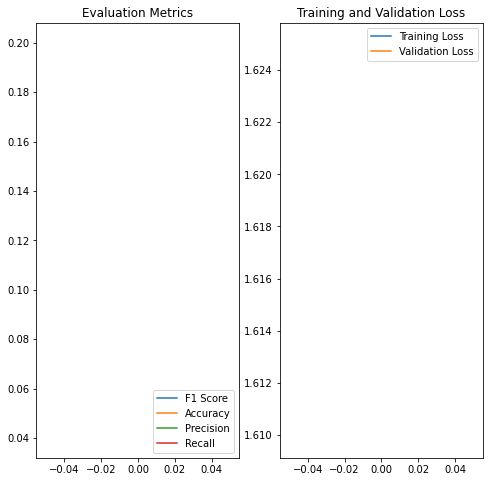

In [499]:
# Plot F1 and losses over epochs
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, f1_list, label='F1 Score')
plt.plot(epochs_range, acc_list, label='Accuracy')
plt.plot(epochs_range, precision_list, label='Precision')
plt.plot(epochs_range, recall_list, label='Recall')
plt.legend(loc='lower right')
plt.title('Evaluation Metrics')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_list, label='Training Loss')
plt.plot(epochs_range, val_loss_list, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [500]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=len(label_dict),
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

# model.to(device)

In [501]:
# # Make sure you don't load from the 3rd epoch on the n=5000 model!

# model.load_state_dict(torch.load(f'/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_{epochs}.model', map_location=torch.device('cuda')))

In [502]:
loss_validation, predictions_validation, true_vals_validation = evaluate(dataloader_validation)

In [503]:
accuracy_per_class(predictions_validation, true_vals_validation)

Class: gaming
Accuracy: 0/500

Class: PS4
Accuracy: 0/500

Class: pokemon
Accuracy: 0/500

Class: xboxone
Accuracy: 500/500

Class: leagueoflegends
Accuracy: 0/500



In [ ]:
loss_test, predictions_test, true_vals_test = evaluate(dataloader_test)

In [ ]:
accuracy_per_class(predictions_test, true_vals_test)

In [ ]:
# val_loss, predictions, true_vals = evaluate(dataloader_test)
f1_test = f1_score_func(predictions_test, true_vals_test)
accuracy_test = accuracy_overall(predictions_test, true_vals_test)
recall_test = recall_overall(predictions_test, true_vals_test)
precision_test = precision_overall(predictions_test, true_vals_test)
tqdm.write(f'Validation loss: {loss_test}')
tqdm.write(f'F1 Score (Weighted): {f1_test}, accuracy: {accuracy_test}, recall: {recall_test}, precision: {precision_test}')

# Error Analysis

In [ ]:
df[df["data_type"] =='test'].head()

In [ ]:
print(len(df[df["data_type"] =='test']))

In [ ]:
test_df_only = df[df["data_type"] =='test']

In [ ]:
print(predictions_test[:5], true_vals_test[:5])

In [ ]:
# Order should correspond to the df.test that was originally fed in 
print(np.argmax(predictions_test, axis=1)[:5], true_vals_test[:5])

In [ ]:
# Add new column in df
test_df_only['model_predictions'] = np.argmax(predictions_test, axis=1)

In [ ]:
test_df_only.head()

In [ ]:
swapped_dict = {}
swapped_dict = dict([(value, key) for key, value in label_dict.items()])
print(swapped_dict)

In [ ]:
# Source: https://stackoverflow.com/questions/24216425/adding-a-new-pandas-column-with-mapped-value-from-a-dictionary
test_df_only["predicted_subreddit"] = test_df_only["model_predictions"].map(swapped_dict)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm_bert = confusion_matrix(true_vals_test, np.argmax(predictions_test, axis=1))
ac_bert = accuracy_score(true_vals_test, np.argmax(predictions_test, axis=1))
class_bert = classification_report(true_vals_test, np.argmax(predictions_test, axis=1))

print(class_bert)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm_bert, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(pd.unique(df['subreddit'].values))
ax.yaxis.set_ticklabels(pd.unique(df['subreddit'].values))

### Random Subreddit Analysis

In [ ]:
# Select the ones that model got incorrect:
# Source: https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
pd.set_option('display.max_colwidth', None)
# test_df_only.loc[(test_df_only['subreddit'] == "philosophy")]
test_df_only.loc[(test_df_only['subreddit'] == "philosophy") & (test_df_only['label'] != test_df_only['model_predictions'])][:20]

In [ ]:
# Average length of subreddit texts in Correct vs. incorrect within philosophy
# Source: https://www.datasnips.com/89/get-average-length-of-text-in-a-dataframe-column/
# df['col_name'].str.len().mean()
print(test_df_only.loc[(test_df_only['subreddit'] == "philosophy") & (test_df_only['model_predictions'] == 1)]["text"].str.len().mean())

print(test_df_only.loc[(test_df_only['subreddit'] == "philosophy")]["text"].str.len().mean())

In [ ]:
test_df_only.loc[(test_df_only['subreddit'] == "memes") & (test_df_only['label'] != test_df_only['model_predictions'])][:20]

### Handpicked Subreddit Analysis

In [ ]:
pd.set_option('display.max_colwidth', None)
# test_df_only.loc[(test_df_only['subreddit'] == "philosophy")]
test_df_only.loc[(test_df_only['subreddit'] == "copypasta") & (test_df_only['label'] != test_df_only['model_predictions'])][:20]

In [ ]:
print(test_df_only.loc[(test_df_only['subreddit'] == "unpopularopinion")]["text"].str.len().mean())
print(test_df_only.loc[(test_df_only['subreddit'] == "wallstreetbets")]["text"].str.len().mean())
print(test_df_only.loc[(test_df_only['subreddit'] == "GenZ")]["text"].str.len().mean())
print(test_df_only.loc[(test_df_only['subreddit'] == "teenagers")]["text"].str.len().mean())
print(test_df_only.loc[(test_df_only['subreddit'] == "copypasta")]["text"].str.len().mean())

### Similar Subreddits Analysis


# Naive Bayes Model

- What are underlying assumptions that make it score so well?

In [407]:
# Source: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
# Source: https://stackoverflow.com/questions/58498187/sklearn-transform-error-expected-2d-array-got-1d-array-instead
# Source: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
# Feature analysis to see if any words are sticking out
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train.reshape(-1,1), y_train)
y_pred = classifier.predict(X_test.reshape(-1,1))

0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

0.9991999995999995


[Text(0, 0.5, 'wallstreetbets'),
 Text(0, 1.5, 'teenagers'),
 Text(0, 2.5, 'GenZ'),
 Text(0, 3.5, 'copypasta'),
 Text(0, 4.5, 'unpopularopinion')]

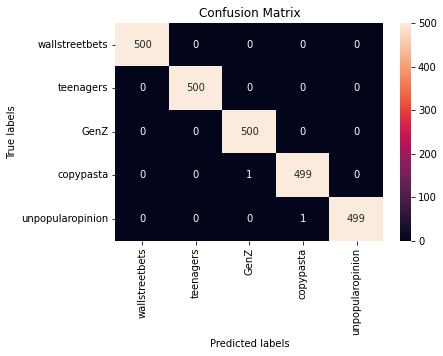

In [408]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm_nb = confusion_matrix(y_test, y_pred)
ac_nb = accuracy_score(y_test, y_pred)
class_nb = classification_report(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred, average='weighted')
print(ac_nb)
print(class_nb)
print(f1_nb)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm_nb, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(pd.unique(df['subreddit'].values))
ax.yaxis.set_ticklabels(pd.unique(df['subreddit'].values))

In [409]:
# Source: https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

imps = permutation_importance(classifier, X_test.reshape(-1,1), y_test)
print(imps)

{'importances_mean': array([0.80224]), 'importances_std': array([0.005019]), 'importances': array([[0.8   , 0.8104, 0.7976, 0.7976, 0.8056]])}


In [410]:
# # Source: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer()
# final_counts = count_vect.fit_transform(df[df.data_type=='test'].text.values)
# # final_counts = count_vect.fit_transform(sorted_data['Text'].values)

# neg_class_prob_sorted = classifier.class_prior_[0].argsort()[::-1]
# pos_class_prob_sorted = classifier.class_prior_[1].argsort()[::-1]
# # neg_class_prob_sorted = classifier.feature_log_prob_[0, :].argsort()[::-1]
# # pos_class_prob_sorted = classifier.feature_log_prob_[1, :].argsort()[::-1]

# print(np.take(count_vect.get_feature_names(), neg_class_prob_sorted[:10]))
# print(np.take(count_vect.get_feature_names(), pos_class_prob_sorted[:10]))

# Create test dataset of an ALL slang sentence

In [159]:
# # Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

# #create test dataset
# test = ['aped yolo mooning']
# test_df = pd.DataFrame(test)
# test_df.columns=['wallstreetbets']
# # test_df.columns = pd.unique(df['subreddit'].values)
# #####
# encoded_data_test = tokenizer.batch_encode_plus(
#   test_df['wallstreetbets'].values.astype(str),
#   add_special_tokens=True,
#   return_attention_mask=True,
#   padding='longest',
#   max_length=256,
#   return_tensors='pt'
# )
# input_ids_test = encoded_data_test['input_ids']
# attention_masks_test = encoded_data_test['attention_mask']
# dataset_test = TensorDataset(input_ids_test, attention_masks_test)
# dataloader_test = DataLoader(dataset_test,
#   sampler=SequentialSampler(dataset_test),
# )
# pred_label=[]

# for batch in dataloader_test:
#   batch = tuple(b.to(device) for b in batch)
#   inputs = {'input_ids': batch[0],
#   'attention_mask': batch[1],
# }
# with torch.no_grad():
#   outputs = model(**inputs)

# logits = outputs[0]
# logits = logits.detach().cpu().numpy()
# label = (list(label_dict.keys())[list(label_dict.values()).index(np.argmax(logits))])
# pred_label.append(label)
# test_df['Predicted Label'] = pred_label

# print(test_df['Predicted Label'])

0    wallstreetbets
Name: Predicted Label, dtype: object
